In [1]:
import pandas as pd
from sqlalchemy import create_engine
import warnings
postgres_user = ''
postgres_pw = ''
postgres_host = '142.93.121.174'
postgres_port = '5432'

## House price model

In [2]:
postgres_db='houseprices'
engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine2)
engine2.dispose()

## Load the houseprices data from Thinkful's database.
Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But, make sure that your work is satisfactory.
## Now, split your data into train and test sets where 20% of the data resides in the test set.
Build several linear regression models including lasso, ridge, or elastic net, and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one.
## Evaluate your best model on the test set.
So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

In [38]:
# check info and shape 
houseprices_df.info()
houseprices_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

(1460, 81)

In [42]:
# check data types
dtypes = {}
for col_name in houseprices_df.columns:
    dtp = str(houseprices_df[col_name].dtypes)
    if dtp in dtypes:
        dtypes[dtp] +=1
    else:
        dtypes[dtp] = 1
print(dtypes)

{'int64': 35, 'object': 43, 'float64': 3}


In [60]:
# the dataset having 81 columns/features  perform data cleaning, convert data types ,find nulls or zero vaules 
# there are object types in dataset check and convert them to int or binary

# check missing values 
nullcols = []
for col_name in houseprices_df.columns:
    nc=houseprices_df[col_name].isna().sum()
    if nc > 0 :
      print(f"null count in {col_name} is :{houseprices_df[col_name].isna().sum()}")
      nullcols.append(col_name)
      print(f"{houseprices_df[col_name].unique()}")


null count in lotfrontage is :259
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
null count in alley is :1369
[None 'Grvl' 'Pave']
null count in masvnrtype is :8
['BrkFace' 'None' 'Stone' 'BrkCmn' None]
null count in masvnrarea is :8
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440

In [59]:
# 19 columns having missing values , for numeric replace with mean and for non numeric add a category called unknown
print(nullcols)

['lotfrontage', 'alley', 'masvnrtype', 'masvnrarea', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'electrical', 'fireplacequ', 'garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 'garagecond', 'poolqc', 'fence', 'miscfeature']


In [61]:
# nulls are in numeric garageyrblt , masvnrarea and lotfrontage
# fill garageyrblt with yearremodadd for null values 
houseprices_df['garageyrblt'] = houseprices_df['garageyrblt'].fillna(houseprices_df['yearremodadd'])
# fill mean for masvnrarea and lotfrontage
houseprices_df['masvnrarea'] = houseprices_df['masvnrarea'].fillna(houseprices_df['masvnrarea'].mean())
houseprices_df['lotfrontage'] = houseprices_df['lotfrontage'].fillna(houseprices_df['lotfrontage'].mean())

In [65]:
for col_name in houseprices_df.columns:
    nc=houseprices_df[col_name].isna().sum()
    if nc > 0 :
        houseprices_df[col_name] = houseprices_df[col_name].fillna('unknown')

In [68]:
# all missing values populated 
for col_name in houseprices_df.columns:
    nc=houseprices_df[col_name].isna().sum()
    if nc > 0 :
        print(f" missing values in {col_name}")
else:
    print(f"dataframe not having any nulls")

dataframe not having any nulls


In [69]:
# check for zero values , leave them if the are valid 
for col_name in houseprices_df.columns:
    zv=(houseprices_df[col_name] == 0).sum()
    if zv > 0 :
      print(f" zero values in {col_name} is {(houseprices_df[col_name] == 0).sum()}")
      #print(f"{houseprices_df[col_name].unique()}")
# all are areas or counts and zeros makes sense in them 

 zero values in masvnrarea is 861
 zero values in bsmtfinsf1 is 467
 zero values in bsmtfinsf2 is 1293
 zero values in bsmtunfsf is 118
 zero values in totalbsmtsf is 37
 zero values in secondflrsf is 829
 zero values in lowqualfinsf is 1434
 zero values in bsmtfullbath is 856
 zero values in bsmthalfbath is 1378
 zero values in fullbath is 9
 zero values in halfbath is 913
 zero values in bedroomabvgr is 6
 zero values in kitchenabvgr is 1
 zero values in fireplaces is 690
 zero values in garagecars is 81
 zero values in garagearea is 81
 zero values in wooddecksf is 761
 zero values in openporchsf is 656
 zero values in enclosedporch is 1252
 zero values in threessnporch is 1436
 zero values in screenporch is 1344
 zero values in poolarea is 1453
 zero values in miscval is 1408


In [101]:
# add dummy features for categorical variables
houseprices_df_enc=houseprices_df
for col_name in houseprices_df_enc.columns:
    dtype = str(houseprices_df_enc[col_name].dtypes)
    if dtype =='object':
        print(f" one hot encoding column name : {col_name}")
        houseprices_df_enc = pd.concat([houseprices_df_enc, pd.get_dummies(houseprices_df_enc[col_name],prefix=col_name,drop_first=True,dtype=int)], axis=1)
for col_name in houseprices_df_enc.columns:
    dtype = str(houseprices_df_enc[col_name].dtypes)
    if dtype =='object':       
        print("droping "+col_name)
        houseprices_df_enc = houseprices_df_enc.drop([col_name], axis=1)
# One-hot encoding the `Grade` variable: 
#pd.get_dummies(houseprices_df["mszoning"],prefix="mszoning").head()
# Append dummies to the YouTube DataFrame

#youtube_df

 one hot encoding column name : mszoning
 one hot encoding column name : street
 one hot encoding column name : alley
 one hot encoding column name : lotshape
 one hot encoding column name : landcontour
 one hot encoding column name : utilities
 one hot encoding column name : lotconfig
 one hot encoding column name : landslope
 one hot encoding column name : neighborhood
 one hot encoding column name : condition1
 one hot encoding column name : condition2
 one hot encoding column name : bldgtype
 one hot encoding column name : housestyle
 one hot encoding column name : roofstyle
 one hot encoding column name : roofmatl
 one hot encoding column name : exterior1st
 one hot encoding column name : exterior2nd
 one hot encoding column name : masvnrtype
 one hot encoding column name : exterqual
 one hot encoding column name : extercond
 one hot encoding column name : foundation
 one hot encoding column name : bsmtqual
 one hot encoding column name : bsmtcond
 one hot encoding column name : b

In [102]:
# encoded categorical values dataset
houseprices_df_enc.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


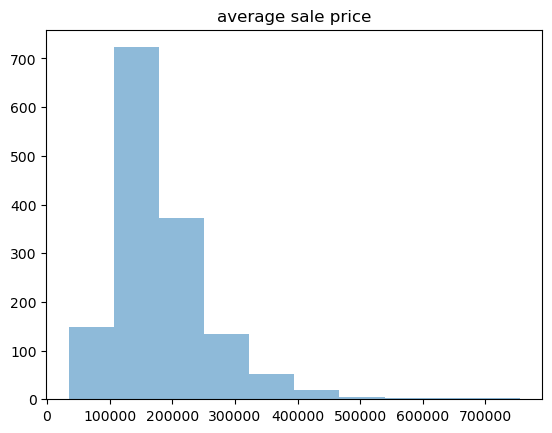

 Jarque-Bera test statistics is 3438.872124122058 and p value is 0.0
 Normality test statistics is [610.83591095] and p value is [2.28384835e-133]


In [114]:
# plot house prices
import matplotlib.pyplot as plt
plt.hist(houseprices_df_enc[['saleprice']], alpha = .5)
plt.title(f'average sale price')
plt.show()
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(houseprices_df_enc[['saleprice']])
norm_stats = normaltest(houseprices_df_enc[['saleprice']])
print(" Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print(" Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

In [109]:
# add correlation matrics to see and drop higly correlated features 
houseprices_df_enc.corr()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.058765,-0.020738,-0.018998,0.038920,0.026133,-0.034852,-0.009018,0.004865,0.015881,-0.020738
mssubclass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.001244,0.014005,-0.045156,-0.014555,0.026359,0.016241,0.030002,0.000983,0.024359,-0.051068
lotfrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.012674,-0.051787,0.126580,-0.023461,-0.089928,-0.037020,-0.018090,0.015818,-0.072074,0.124842
lotarea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.001076,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635
overallqual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.004269,-0.021172,0.327412,-0.057962,-0.225013,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
salecondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
salecondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
salecondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
salecondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [108]:
# perform PCA and eigenvector and select number of features 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(houseprices_df_enc)
# PCA
pca = PCA(n_components=20)  # example with 2 components
principal_components = pca.fit_transform(scaled_data)

# Explained variance
print(pca.explained_variance_ratio_)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
# find out liers and normalize if needed 

In [117]:
# now split data to train and test datasets 
# `Y` is the target variable
Y = houseprices_df_enc['saleprice']
# `X` is the feature set which includes the
X = houseprices_df_enc.drop(['saleprice'], axis =1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [118]:
# build regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
# Fit an OLS model using scikit-learn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# You are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.9355125920964305
-----Test set statistics-----
R-squared of the model in the test set is: 0.815070101465209
Mean absolute error of the prediction is: 20247.22299121958
Mean squared error of the prediction is: 1241564614.13566
Root mean squared error of the prediction is: 35235.84274762929
Mean absolute percentage error of the prediction is: 11.856062437268903


In [131]:
# try lasso ,ridge, or elastic net, and train them in the training set. Use k-fold cross-validation to select the best hyperparameters
from sklearn.linear_model import Lasso
lassoregr = Lasso(alpha=10**.5)
lassoregr.fit(X_train, y_train)

# You are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.9346782941802957
-----Test set statistics-----
R-squared of the model on the test set is: 0.8739464995869309
Mean absolute error of the prediction is: 18563.836857502105
Mean squared error of the prediction is: 846285899.9047049
Root mean squared error of the prediction is: 29090.993449944348
Mean absolute percentage error of the prediction is: 10.873933327721751


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.533e+11, tolerance: 7.245e+08
  model = cd_fast.enet_coordinate_descent(


In [136]:
#ridge
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Here, `alpha` is the regularization
# parameter (usually called `lambda`). As `alpha` gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

# You are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [132]:
# elastic net 
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# You are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## select the best model from it 
 From R sqaure values the lasso regression model with all the features is explaining about 93% on the train dataset and on test it is better explaining 87 percent

 ## Note: summary questions help
 -- The model is good enough but I had lot many features , need help in reducing the features in dataset
 -- the ridge and elastic regressions are not running need help with it too 